In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.datasets import fetch_california_housing, fetch_openml

X, y = fetch_openml(name="California_housing", version=1, as_frame=True, return_X_y=True)

# California Housing dataset (1996 Census)
# Equivalent to sklearn.datasets.fetch_california_housing
# Loaded via OpenML and transformed due to HTTP 483 error in Colab

df = X.copy()
df["MedHouseVal"] = y

df["AveRooms"] = df["total_rooms"] / df["households"]
df["AveBedrms"] = df["total_bedrooms"] / df["households"]
df["Awcocup"] = df["population"] / df["households"]

# Selecting only necessary cols
df = df[["median_income", "housing_median_age", "AveRooms", "AveBedrms", "population", "Awcocup", "latitude", "longitude", "MedHouseVal"]]

df.dropna(inplace=True)

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.metrics import mean_squared_error

# Initialize linear regression model (no regularization)
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Observe coefficients
print("Coefficients of Linear Regression:\n", lr.coef_)

# Predict on training and test sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Compute MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Linear Regression MSE (Train):", mse_train)
print("Linear Regression MSE (Test):", mse_test)


Coefficients of Linear Regression:
 [ 4.44694449e+04  9.58332354e+02 -1.20980333e+04  7.78406984e+04
 -5.20319679e-01 -3.44070850e+02 -4.20293189e+04 -4.32443933e+04]
Linear Regression MSE (Train): 5162710048.331072
Linear Regression MSE (Test): 5645922500.077655


In [13]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Define alpha grid
alpha_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Ridge Regression GridSearch
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid=alpha_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
print("Best alpha for Ridge:", ridge_cv.best_params_['alpha'])

# Lasso Regression GridSearch
lasso = Lasso(max_iter=10000)
lasso_cv = GridSearchCV(lasso, param_grid=alpha_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
print("Best alpha for Lasso:", lasso_cv.best_params_['alpha'])

# Evaluate on test set
ridge_best = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge_best.fit(X_train, y_train)
ridge_pred = ridge_best.predict(X_test)

lasso_best = Lasso(alpha=lasso_cv.best_params_['alpha'], max_iter=10000)
lasso_best.fit(X_train, y_train)
lasso_pred = lasso_best.predict(X_test)

from sklearn.metrics import mean_squared_error
print("Ridge MSE (Test):", mean_squared_error(y_test, ridge_pred))
print("Lasso MSE (Test):", mean_squared_error(y_test, lasso_pred))


Best alpha for Ridge: 0.01
Best alpha for Lasso: 0.01
Ridge MSE (Test): 5645913864.000843
Lasso MSE (Test): 5645920494.171703


In [14]:
# Coefficients comparison
print("Linear Regression Coefficients:\n", lr.coef_)
print("Ridge Coefficients:\n", ridge_best.coef_)
print("Lasso Coefficients:\n", lasso_best.coef_)

# Observations
# - Lasso (L1) produces sparse coefficients (some are zero)
# - Ridge (L2) shrinks coefficients but keeps most non-zero
# - Regularization reduces variance, prevents overfitting
# - Too large alpha can underfit (increase bias)


Linear Regression Coefficients:
 [ 4.44694449e+04  9.58332354e+02 -1.20980333e+04  7.78406984e+04
 -5.20319679e-01 -3.44070850e+02 -4.20293189e+04 -4.32443933e+04]
Ridge Coefficients:
 [ 4.44692826e+04  9.58334040e+02 -1.20977262e+04  7.78389796e+04
 -5.20315366e-01 -3.44070425e+02 -4.20293109e+04 -4.32443645e+04]
Lasso Coefficients:
 [ 4.44694057e+04  9.58332932e+02 -1.20979583e+04  7.78402832e+04
 -5.20317761e-01 -3.44070693e+02 -4.20293057e+04 -4.32443743e+04]


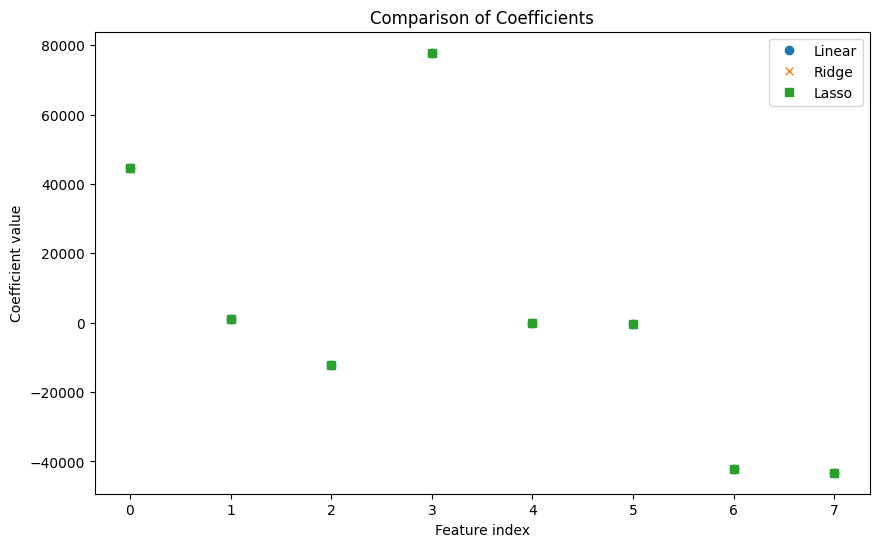

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(lr.coef_, 'o', label='Linear')
plt.plot(ridge_best.coef_, 'x', label='Ridge')
plt.plot(lasso_best.coef_, 's', label='Lasso')
plt.xlabel("Feature index")
plt.ylabel("Coefficient value")
plt.title("Comparison of Coefficients")
plt.legend()
plt.show()


In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split dataset into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)

Training features shape: (455, 30)
Test features shape: (114, 30)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression (default settings)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Coefficients
print("Logistic Regression Coefficients:\n", logreg.coef_)

# Predict and evaluate accuracy
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

print("Accuracy (Train):", accuracy_score(y_train, y_train_pred))
print("Accuracy (Test):", accuracy_score(y_test, y_test_pred))


Logistic Regression Coefficients:
 [[ 1.0274368   0.22145051 -0.36213488  0.0254667  -0.15623532 -0.23771256
  -0.53255786 -0.28369224 -0.22668189 -0.03649446 -0.09710208  1.3705667
  -0.18140942 -0.08719575 -0.02245523  0.04736092 -0.04294784 -0.03240188
  -0.03473732  0.01160522  0.11165329 -0.50887722 -0.01555395 -0.016857
  -0.30773117 -0.77270908 -1.42859535 -0.51092923 -0.74689363 -0.10094404]]
Accuracy (Train): 0.9582417582417583
Accuracy (Test): 0.956140350877193


In [18]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1','l2'],
    'solver': ['liblinear']  # liblinear supports both l1 and l2
}

grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

# Evaluate on test set
best_logreg = grid.best_estimator_
y_test_pred = best_logreg.predict(X_test)
print("Logistic Regression Accuracy (Test):", accuracy_score(y_test, y_test_pred))


Best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Accuracy (Test): 0.9824561403508771


In [19]:
# L1 Regularization
logreg_l1 = LogisticRegression(penalty='l1', C=grid.best_params_['C'], solver='liblinear', max_iter=10000)
logreg_l1.fit(X_train, y_train)
y_test_pred_l1 = logreg_l1.predict(X_test)

# L2 Regularization
logreg_l2 = LogisticRegression(penalty='l2', C=grid.best_params_['C'], solver='liblinear', max_iter=10000)
logreg_l2.fit(X_train, y_train)
y_test_pred_l2 = logreg_l2.predict(X_test)

# Compare coefficients
print("L1 Coefficients:\n", logreg_l1.coef_)
print("L2 Coefficients:\n", logreg_l2.coef_)

# Compare accuracy
print("Accuracy L1 (Test):", accuracy_score(y_test, y_test_pred_l1))
print("Accuracy L2 (Test):", accuracy_score(y_test, y_test_pred_l2))

# Observations:
# - L1 produces sparse coefficients (some exactly zero)
# - L2 shrinks coefficients but rarely zero
# - Regularization reduces variance and overfitting
# - Too strong regularization increases bias, reducing accuracy

L1 Coefficients:
 [[ 7.60228538e-01 -1.08023875e-01  9.70719518e-02 -2.37732516e-03
   0.00000000e+00  4.73833426e+01 -1.14936728e+01 -1.36540188e+02
   1.98391071e+01  0.00000000e+00  0.00000000e+00  1.72478691e+00
   0.00000000e+00 -1.97572207e-01  0.00000000e+00  0.00000000e+00
   4.98790995e+01  0.00000000e+00  1.86407186e+01  0.00000000e+00
   1.79604897e-01 -4.38201848e-01  5.46537643e-02 -2.05553109e-02
  -2.17042756e+01  8.00365032e+00 -1.47140998e+01 -2.51351150e+01
  -2.52942683e+01  0.00000000e+00]]
L2 Coefficients:
 [[ 5.40272741  0.26573732 -0.52651203 -0.02095479 -2.29922151 -0.2169419
  -3.56980218 -5.0110607  -2.26418385  0.36762747 -0.58036525  3.84169255
  -0.63875637 -0.10714305 -0.40591246  3.57237002  4.36577514 -0.26636925
   0.39354765  0.62630698 -0.20718582 -0.68999884  0.17661962 -0.01813087
  -4.67716843 -0.0140846  -4.46493229 -7.61271125 -6.83571871  0.57463274]]
Accuracy L1 (Test): 0.9824561403508771
Accuracy L2 (Test): 0.956140350877193


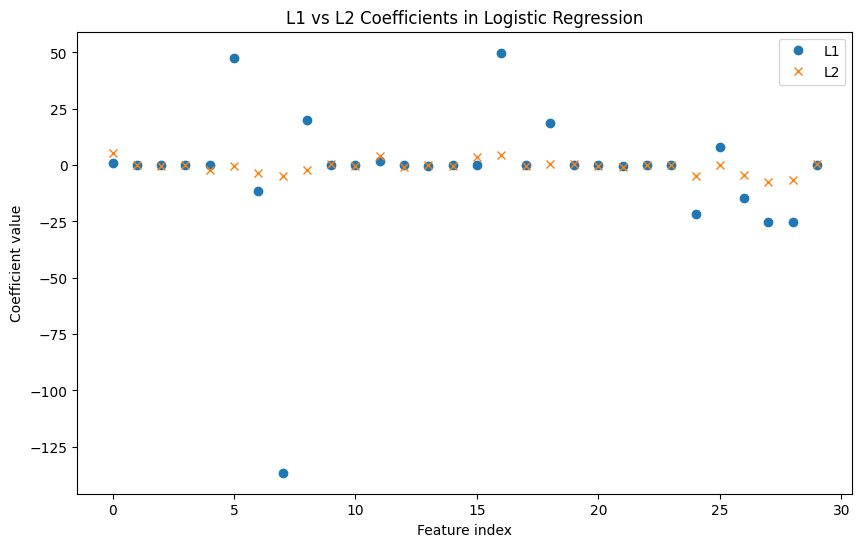

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(logreg_l1.coef_[0], 'o', label='L1')
plt.plot(logreg_l2.coef_[0], 'x', label='L2')
plt.xlabel("Feature index")
plt.ylabel("Coefficient value")
plt.title("L1 vs L2 Coefficients in Logistic Regression")
plt.legend()
plt.show()
